In [1]:
pip install nltk networkx matplotlib

In [2]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lonovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lonovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lonovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lonovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lonovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lonovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lonovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lonovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lonovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lonovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\lonovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:

from nltk import word_tokenize, pos_tag

sentence = "The cat chased the mouse in the garden."
tokens = word_tokenize(sentence)
pos_tags = pos_tag(tokens)

nouns = [w for w, p in pos_tags if p.startswith('NN')]
verbs = [w for w, p in pos_tags if p.startswith('VB')]

print("Noms :", nouns)
print("Verbes :", verbs)


Noms : ['cat', 'mouse', 'garden']
Verbes : ['chased']


In [ ]:

from nltk.corpus import wordnet as wn

def get_synset(word, pos):
    synsets = wn.synsets(word, pos=pos)
    return synsets[0] if synsets else None

synsets = {
    "cat": get_synset("cat", wn.NOUN),
    "mouse": get_synset("mouse", wn.NOUN),
    "garden": get_synset("garden", wn.NOUN),
    "chased": get_synset("chase", wn.VERB)
}

for k, v in synsets.items():
    print(k, "→", v)

cat → Synset('cat.n.01')
mouse → Synset('mouse.n.01')
garden → Synset('garden.n.01')
chased → Synset('chase.v.01')


In [ ]:
import networkx as nx

G = nx.DiGraph()

for syn in synsets.values():
    if syn:
        G.add_node(syn.name())

        for h in syn.hypernyms():
            G.add_edge(syn.name(), h.name(), label="is-a")

        for m in syn.part_meronyms():
            G.add_edge(syn.name(), m.name(), label="part-of")

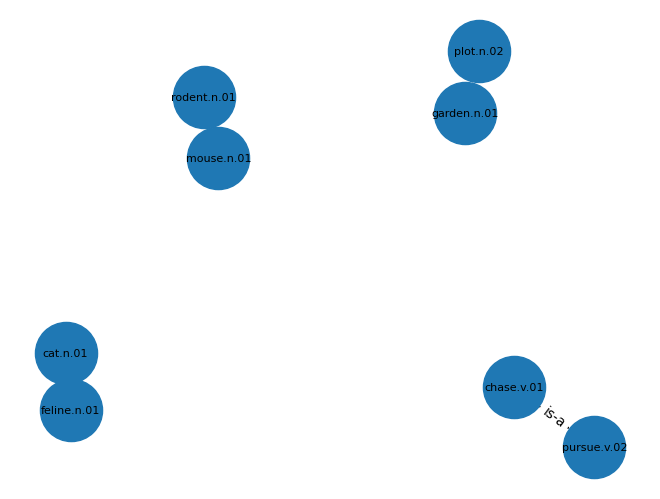

In [ ]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'label')

nx.draw(G, pos, with_labels=True, node_size=2000, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [ ]:
sentence = "The chef prepared a meal and served it to the guests."
tokens = word_tokenize(sentence)
pos_tags = pos_tag(tokens)

nouns = [w for w, p in pos_tags if p.startswith('NN')]
verbs = [w for w, p in pos_tags if p.startswith('VB')]

G = nx.DiGraph()

for word in nouns + verbs:
    syn = wn.synsets(word)
    if syn:
        s = syn[0]
        G.add_node(s.name())

        for lemma in s.lemmas():
            G.add_node(lemma.name())
            G.add_edge(s.name(), lemma.name(), label="synonym")

        for h in s.hypernyms():
            G.add_edge(s.name(), h.name(), label="is-a")

In [11]:
G.add_edge("prepare.v.01", "meal.n.01", label="object")
G.add_edge("serve.v.01", "guest.n.01", label="recipient")

Noms: ['chef', 'meal', 'guests']
Verbes: ['prepared', 'served']


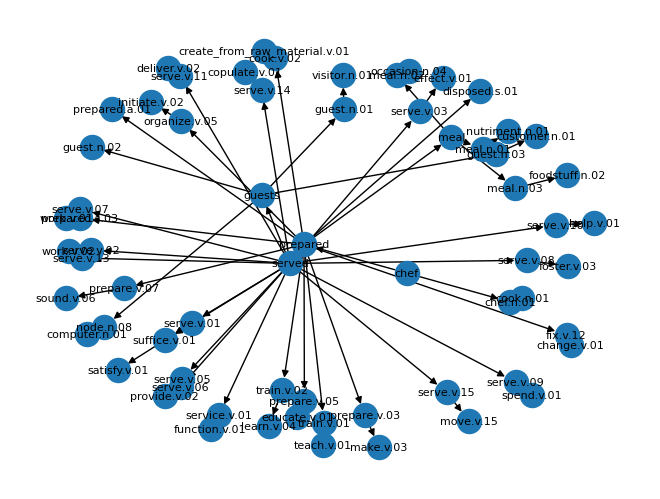

In [12]:
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet as wn
import networkx as nx
import matplotlib.pyplot as plt

sentence = "The chef prepared a meal and served it to the guests."

tokens = word_tokenize(sentence)
tags = pos_tag(tokens)

nouns = [w for w, t in tags if t.startswith("NN")]
verbs = [w for w, t in tags if t.startswith("VB")]

print("Noms:", nouns)
print("Verbes:", verbs)

G = nx.DiGraph()

for word in nouns + verbs:
    G.add_node(word)
    for syn in wn.synsets(word):
        G.add_node(syn.name())
        G.add_edge(word, syn.name(), label="synonyme")
        for h in syn.hypernyms():
            G.add_edge(syn.name(), h.name(), label="hyperonyme")

roles = [("prepared", "meal", "theme"),
         ("served", "guests", "beneficiary"),
         ("chef", "prepared", "agent")]

for v, n, role in roles:
    G.add_edge(v, n, label=role)

nx.draw(G, with_labels=True, font_size=8)
plt.show()


Noms: ['Alice', 'laptop', 'store', 'laptop', 'report']
Verbes: ['bought', 'used', 'write']


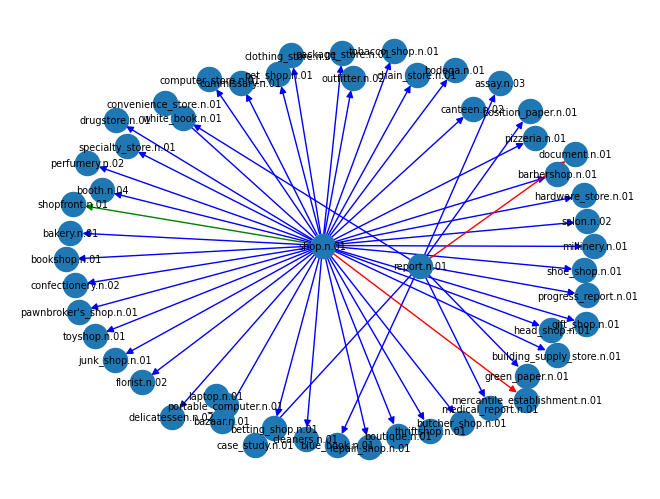

In [ ]:
text = "Alice bought a laptop from the store. She used the laptop to write a report."
tokens = word_tokenize(text)
tags = pos_tag(tokens)

nouns = [w for w, t in tags if t.startswith("NN")]
verbs = [w for w, t in tags if t.startswith("VB")]

print("Noms:", nouns)
print("Verbes:", verbs)

G = nx.DiGraph()

for word in set(nouns):
    synsets = wn.synsets(word, pos=wn.NOUN)
    if not synsets:
        continue   
    syn = synsets[0]
    G.add_node(syn.name())

    for h in syn.hypernyms():
        G.add_edge(syn.name(), h.name(), color='red')

    for hypo in syn.hyponyms():
        G.add_edge(syn.name(), hypo.name(), color='blue')

    for part in syn.part_meronyms():
        G.add_edge(syn.name(), part.name(), color='green')


colors = [G[u][v]['color'] for u,v in G.edges()]
nx.draw(G, edge_color=colors, with_labels=True, font_size=7)
plt.show()


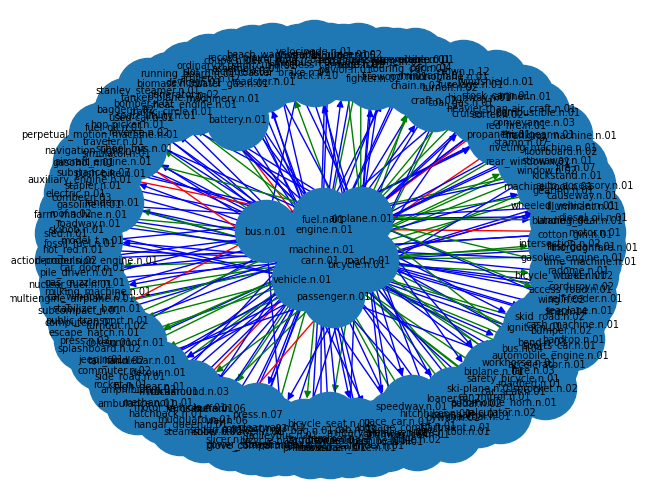

In [15]:
words = ["car", "bus", "bicycle", "vehicle", "machine", "engine", "battery", "fuel", "passenger", "road", "airplane"]

G = nx.DiGraph()

for word in words:
    syn = wn.synsets(word)[0]
    G.add_node(syn.name())

    for h in syn.hypernyms():
        G.add_edge(syn.name(), h.name(), color="red")
    for hypo in syn.hyponyms():
        G.add_edge(syn.name(), hypo.name(), color="blue")
    for m in syn.part_meronyms():
        G.add_edge(syn.name(), m.name(), color="green")

colors = [G[u][v]['color'] for u,v in G.edges()]
nx.draw(G, edge_color=colors, with_labels=True, node_size=2000, font_size=7)
plt.show()
